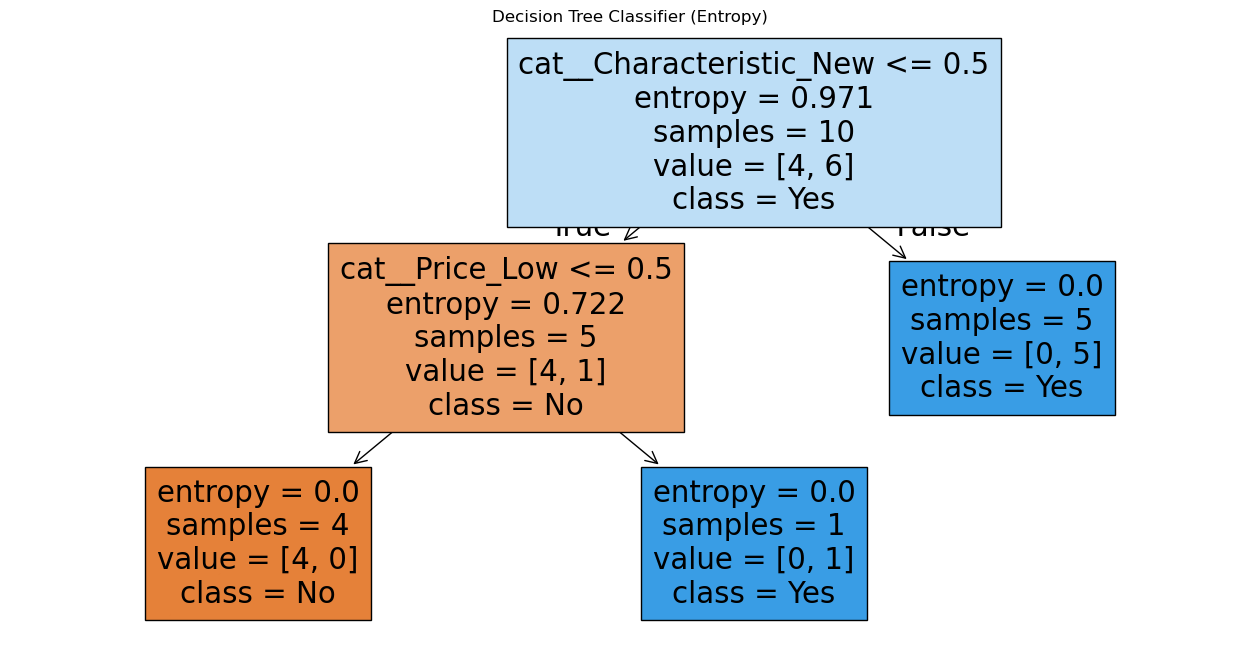

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.DataFrame({
    "Type": ["Phone","Phone","Laptop","Laptop","Tablet","Tablet","Phone","Laptop","Tablet","Phone"],
    "Price": ["High","Low","High","Low","Medium","Low","Medium","Medium","High","Low"],
    "Characteristic": ["New","New","Old","New","Old","New","Old","Old","New","Old"],
    "Origin": ["USA","China","USA","China","USA","China","China","USA","China","USA"],
    "Buy": ["Yes","Yes","No","Yes","No","Yes","No","No","Yes","Yes"]
})

X = df.drop(columns=["Buy"])
y = df["Buy"]

encoder = ColumnTransformer(
    [("cat", OneHotEncoder(), X.columns)],
    remainder="drop"
)

model = Pipeline([
    ("enc", encoder),
    ("tree", DecisionTreeClassifier(criterion="entropy", max_depth=3))
])

model.fit(X, y)

plt.figure(figsize=(16,8))
plot_tree(
    model.named_steps["tree"],
    feature_names=model.named_steps["enc"].get_feature_names_out(),
    class_names=["No","Yes"],
    filled=True
)
plt.title("Decision Tree Classifier (Entropy)")
plt.savefig("Figure1_DecisionTree.png", dpi=300)
plt.show()

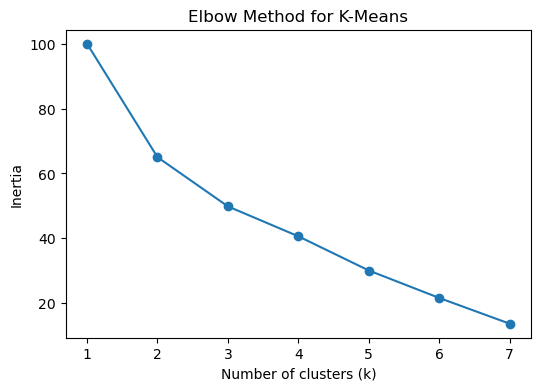

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df.drop(columns=["Buy"])
X_enc = encoder.fit_transform(X)
X_scaled = StandardScaler().fit_transform(X_enc)

inertia = []
k_values = range(1, 8)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_values, inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.savefig("Figure2_Elbow.png", dpi=300)
plt.show()

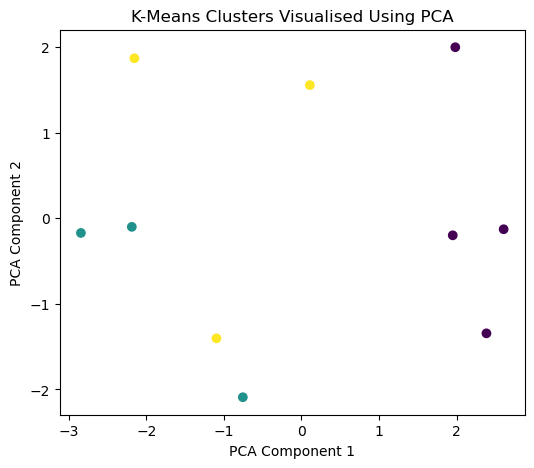

In [3]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clusters Visualised Using PCA")
plt.savefig("Figure3_PCA.png", dpi=300)
plt.show()

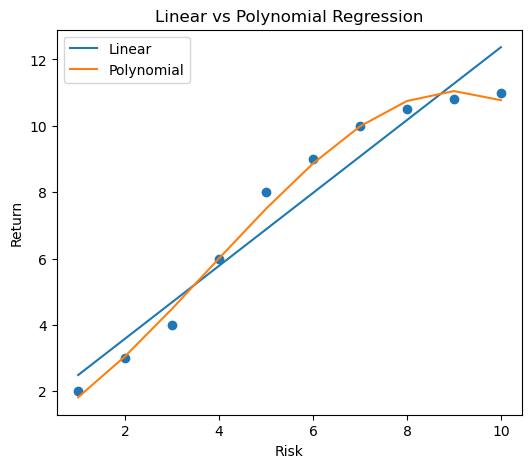

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

risk = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)
returns = np.array([2,3,4,6,8,9,10,10.5,10.8,11])

lin = LinearRegression()
lin.fit(risk, returns)

poly = PolynomialFeatures(degree=3)
risk_poly = poly.fit_transform(risk)
lin_poly = LinearRegression()
lin_poly.fit(risk_poly, returns)

x_sorted = np.sort(risk, axis=0)
plt.figure(figsize=(6,5))
plt.scatter(risk, returns)
plt.plot(x_sorted, lin.predict(x_sorted), label="Linear")
plt.plot(x_sorted, lin_poly.predict(poly.transform(x_sorted)), label="Polynomial")
plt.xlabel("Risk")
plt.ylabel("Return")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.savefig("Figure4_Regression.png", dpi=300)
plt.show()